<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Recurrent_Neural_Network_Basic_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Setting x and y data

In [2]:
x = torch.linspace(0,799,800)

In [12]:
y = torch.sin(x*2*3.1416/40)

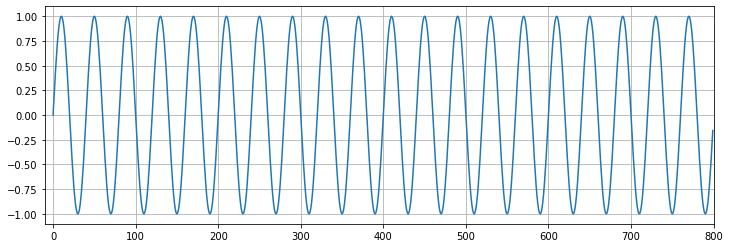

In [13]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

## Train and test split

In [14]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

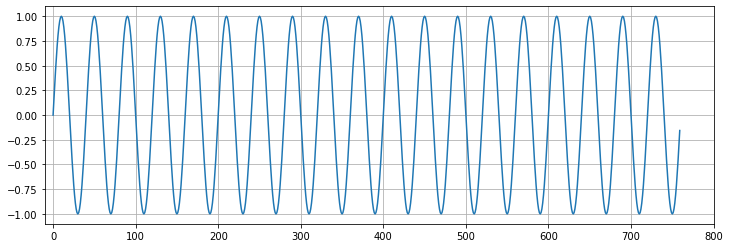

In [15]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

## Creating function to extract sequential train and label sets

In [16]:
def input_data(seq,ws):

  out = [] #([0,1,2,3],[4]), ([1,2,3,4],[5]).......
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))
    
  return out

In [18]:
window_size = 40
train_data = input_data(train_set,window_size)

In [19]:
len(train_data)

720

In [ ]:
train_data

0-799 --> 800
800- 40 ---> 760 when we first split test and training data
760-40 ---> when we call input_data function to create windows test and traing data along the train_size

In [21]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [22]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

## Recurrent Neural Network

In [31]:
class LSTM(nn.Module):

  def __init__(self,input_size=1,hidden_size=50,out_size=1): # hidden_size is neuron number to play around

    super().__init__()
    self.hidden_size = hidden_size

    self.lstm = nn.LSTM(input_size,hidden_size)

    self.linear = nn.Linear(hidden_size,out_size)

    self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))

  def forward(self,seq):

    lstm_out,self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)

    pred = self.linear(lstm_out.view(len(seq),-1))

    # [1,2,3]  [4] ---> [1,2,3,4 ----> 4]
    return pred[-1]

In [26]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [28]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [29]:
for p in model.parameters():
  print(p.numel())

200
10000
200
200
50
1


## Training and Result

Epoch 0 Loss: 0.04198049008846283
Performance on test range: 0.5199716687202454


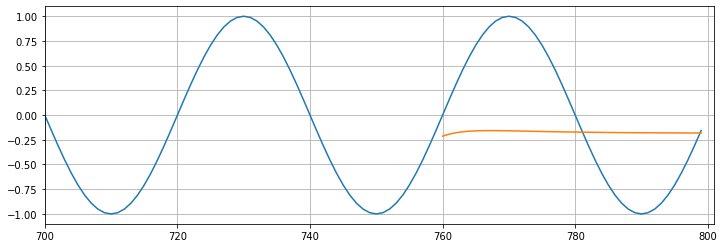

Epoch 1 Loss: 0.017842764034867287
Performance on test range: 0.42209967970848083


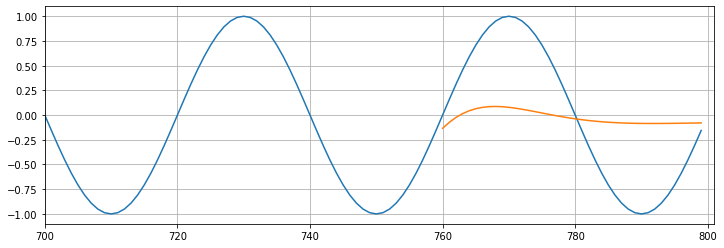

Epoch 2 Loss: 0.0028870997484773397
Performance on test range: 0.1662413775920868


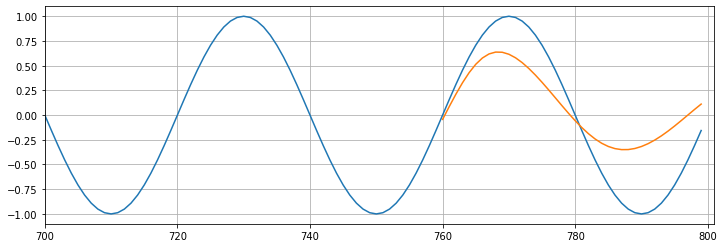

Epoch 3 Loss: 0.00032007633126340806
Performance on test range: 0.030554398894309998


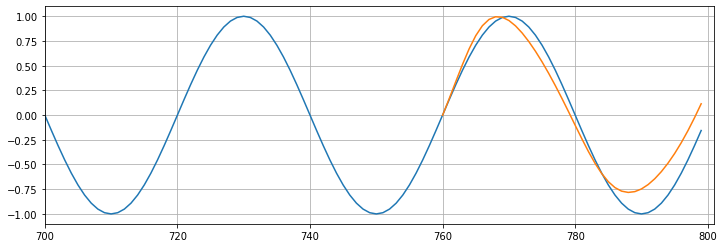

Epoch 4 Loss: 0.00012969138333573937
Performance on test range: 0.014990145340561867


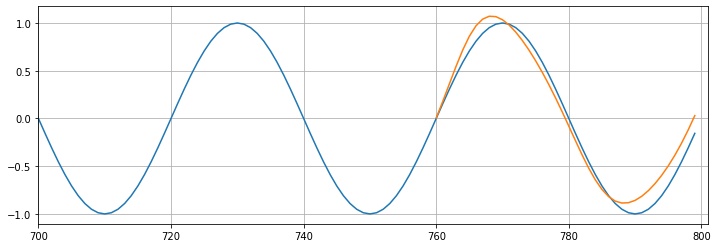

Epoch 5 Loss: 0.00012006700853817165
Performance on test range: 0.011856677010655403


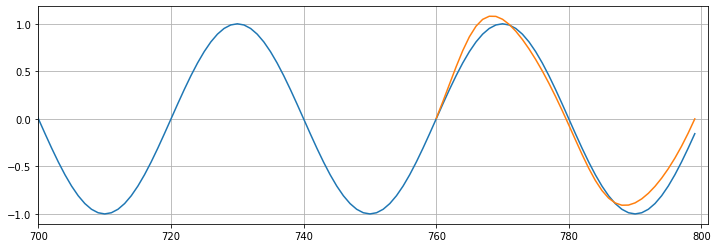

Epoch 6 Loss: 0.0001265565661014989
Performance on test range: 0.010163756087422371


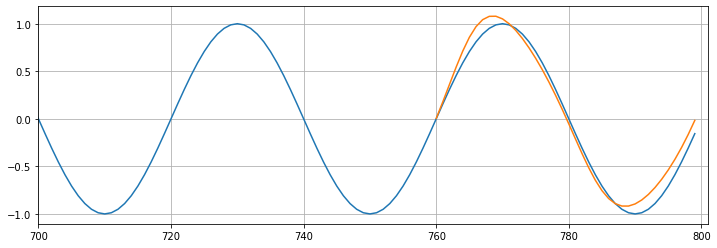

Epoch 7 Loss: 0.00013195372594054788
Performance on test range: 0.008897612802684307


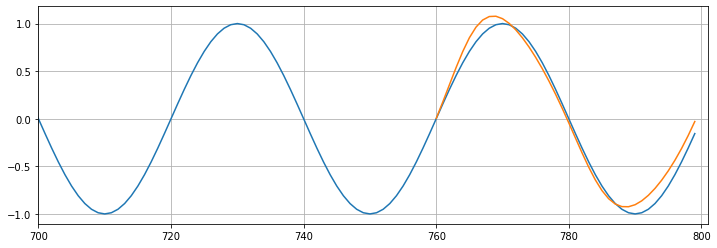

Epoch 8 Loss: 0.00013450233382172883
Performance on test range: 0.007882212288677692


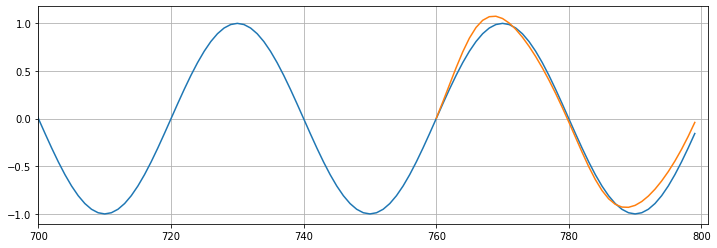

Epoch 9 Loss: 0.00013458252942655236
Performance on test range: 0.007052371744066477


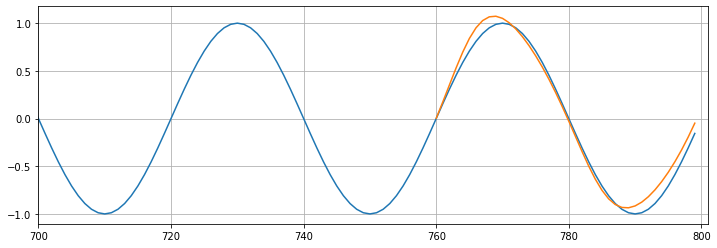

In [35]:
epochs = 10
future = 40

for i in range(epochs):

  for seq,y_train in train_data:

    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()

  print('Epoch {} Loss: {}'.format(i,loss.item()))

  preds = train_set[-window_size:].tolist()

  for f in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():

      model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))

      preds.append(model(seq).item())

  loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
  print('Performance on test range: {}'.format(loss))

  plt.figure(figsize=(12,4))
  plt.xlim(700,801)
  plt.grid(True)
  plt.plot(y.numpy())
  plt.plot(range(760,800),preds[window_size:])
  plt.show()


## Retraining with all data


In [36]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y,window_size)
len(all_data)

760

In [37]:
import time
start_time = time.time()

for i in range(epochs):

  for seq,y_train in all_data:

    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()

  print('Epoch {} Loss: {}'.format(i,loss.item()))

total_time = time.time() - start_time
print(total_time/60)

Epoch 0 Loss: 0.00013261665299069136
Epoch 1 Loss: 0.00012921904271934181
Epoch 2 Loss: 0.00012484181206673384
Epoch 3 Loss: 0.00011986168829025701
Epoch 4 Loss: 0.0001145506466855295
Epoch 5 Loss: 0.00010911418939940631
Epoch 6 Loss: 0.00010369271331001073
Epoch 7 Loss: 9.838897676672786e-05
Epoch 8 Loss: 9.327079897047952e-05
Epoch 9 Loss: 8.83784014149569e-05
Epoch 10 Loss: 8.373201853828505e-05
Epoch 11 Loss: 7.934642053442076e-05
Epoch 12 Loss: 7.522192026954144e-05
Epoch 13 Loss: 7.13554400135763e-05
Epoch 14 Loss: 6.773560744477436e-05
1.1595484553903774


## Forecasting unknown future

In [43]:
preds = y[-window_size:].tolist()

for i in range(future):

  seq = torch.FloatTensor(preds[-window_size:])

  with torch.no_grad():

    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))

    preds.append(model(seq).item())


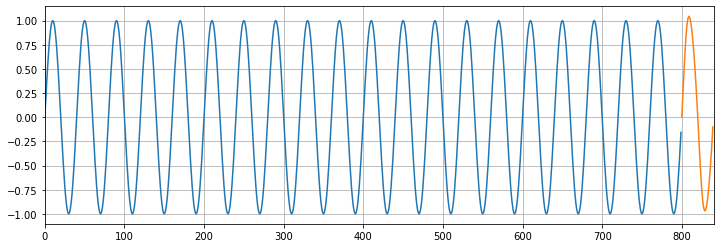

In [44]:
plt.figure(figsize=(12,4))
plt.xlim(0,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()